In [ ]:
import pandas as pd
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('macro.csv')

In [ ]:
import numpy as np

вещественные фичи

In [ ]:
columns_to_drop = df1.columns[
    df1.columns.str.contains('_km') & ~df1.columns.str.contains('school_|park_|green_zone_|metro_|public_transport_station_|mkad_')
]
columns_to_drop

Index(['kindergarten_km', 'industrial_km', 'water_treatment_km', 'cemetery_km',
       'incineration_km', 'railroad_station_walk_km',
       'railroad_station_avto_km', 'water_km', 'ttk_km', 'sadovoe_km',
       'bulvar_ring_km', 'kremlin_km', 'big_road1_km', 'big_road2_km',
       'railroad_km', 'zd_vokzaly_avto_km', 'bus_terminal_avto_km',
       'oil_chemistry_km', 'nuclear_reactor_km', 'radiation_km',
       'power_transmission_line_km', 'thermal_power_plant_km', 'ts_km',
       'big_market_km', 'market_shop_km', 'fitness_km', 'swim_pool_km',
       'ice_rink_km', 'stadium_km', 'basketball_km', 'hospice_morgue_km',
       'detention_facility_km', 'public_healthcare_km', 'university_km',
       'workplaces_km', 'shopping_centers_km', 'office_km',
       'additional_education_km', 'big_church_km', 'church_synagogue_km',
       'mosque_km', 'theater_km', 'museum_km', 'exhibition_km', 'catering_km'],
      dtype='object')

In [ ]:
columns_to_drop = columns_to_drop.union(df1.columns[df1.columns.str.contains('_5000|_3000|_2000|_1500|sqm')])
columns_to_drop

Index(['additional_education_km', 'basketball_km', 'big_church_count_1500',
       'big_church_count_2000', 'big_church_count_3000',
       'big_church_count_5000', 'big_church_km', 'big_market_km',
       'big_road1_km', 'big_road2_km',
       ...
       'trc_sqm_3000', 'trc_sqm_500', 'trc_sqm_5000', 'ts_km', 'ttk_km',
       'university_km', 'water_km', 'water_treatment_km', 'workplaces_km',
       'zd_vokzaly_avto_km'],
      dtype='object', length=143)

In [ ]:
columns_to_drop = columns_to_drop.union(df1.columns[df1.columns.str.contains('price_') & ~df1.columns.str.contains('price_doc')])

In [ ]:
columns_to_drop = columns_to_drop.union(df1.columns[
    df1.columns.str.contains('_count') & ~df1.columns.str.contains('green_part|trc_|cafe_')
])

In [ ]:
columns_to_drop = columns_to_drop.union(df1.columns[
    df1.columns.str.contains('_500|_1000|sqm') & ~df1.columns.str.contains('green_part|trc_|cafe_')
])

In [ ]:
columns_to_drop = columns_to_drop.union(df1.columns[df1.columns.str.contains('sqm')])

In [ ]:
columns_to_drop = columns_to_drop.union(df1.columns[df1.columns.str.contains('male|ID|cafe_count_500_na_price|cafe_count_1000_na_price|preschool')])

In [ ]:
columns_to_drop = columns_to_drop.union(df1.columns[
    df1.columns.str.contains('_all') & ~df1.columns.str.contains('full')
])

In [ ]:
columns_to_drop = columns_to_drop.union(df1.columns[df1.columns.str.contains('_raion')])

In [ ]:
df1 = df1.drop(columns=columns_to_drop)
df1.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_school,school_quota,culture_objects_top_25,full_all,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,school_km,park_km,green_zone_km,railroad_station_walk_min,railroad_station_avto_min,public_transport_station_km,public_transport_station_min_walk,water_1line,mkad_km,big_road1_1line,railroad_1line,ecology,green_part_500,trc_count_500,cafe_count_500,green_part_1000,trc_count_1000,cafe_count_1000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,10309,11065.0,no,86206,2.590241,1.131260,13.575119,1.131260,0.177975,2.158587,0.600973,65.038716,6.905893,0.274985,3.299822,no,1.422391,no,no,good,0.00,0,0,7.36,3,19,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,7759,6237.0,yes,76284,0.936700,0.647337,7.620630,0.635053,0.273345,0.550690,0.065321,40.943917,4.679745,0.065263,0.783160,no,9.503405,no,no,excellent,25.14,0,5,26.66,5,13,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,6207,5580.0,no,101982,2.120999,1.637996,17.351515,1.445960,0.158072,0.374848,0.453172,15.331896,1.701420,0.328756,3.945073,no,5.604800,no,no,poor,1.67,0,3,4.99,0,9,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13670,17063.0,no,21155,1.489049,0.984537,11.565624,0.963802,0.236455,0.078090,0.106125,51.497190,5.271136,0.131597,1.579164,no,2.677824,no,no,good,17.36,0,2,19.25,6,12,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,6748,7770.0,no,28179,1.257186,0.876620,8.266305,0.688859,0.376838,0.258289,0.236214,10.247521,2.156284,0.071480,0.857764,no,11.616653,no,yes,excellent,3.56,1,48,3.34,3,153,16331452


build_year life_sq max_floor state kitch_sq

In [ ]:
columns_to_fill = ['life_sq', 'max_floor', 'max_floor', 'floor', 'build_year', 'num_room', 'kitch_sq', 'state', 'metro_min_walk', 'metro_km_walk', 'railroad_station_walk_min',]

for col in columns_to_fill:
    df1[col] = df1[col].fillna(df1[col].median())

In [ ]:
df1.isna().sum()

,0
id,0
timestamp,0
full_sq,0
life_sq,0
floor,0
max_floor,0
material,9572
build_year,0
num_room,0
kitch_sq,0


In [ ]:
df1 = df1.drop(columns=['school_quota', 'material'])

In [ ]:
df1.isna().sum()

,0
id,0
timestamp,0
full_sq,0
life_sq,0
floor,0
max_floor,0
build_year,0
num_room,0
kitch_sq,0
state,0


In [ ]:
num_features = [col for col in df1.columns if df1[col].dtype != 'object' and col != 'price']
cat_features = [col for col in df1.columns if df1[col].dtype == 'object']
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df1[num_features].describe()

,id,full_sq,life_sq,floor,max_floor,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_school,full_all,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,school_km,park_km,green_zone_km,railroad_station_walk_min,railroad_station_avto_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,green_part_500,trc_count_500,cafe_count_500,green_part_1000,trc_count_1000,cafe_count_1000,price_doc
count,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,33.480883,7.664386,12.383381,2.581804e+03,1.938138,6.273867,2.059401,1.765705e+07,84056.425552,0.218922,0.118871,5354.269699,1.463062e+05,4.961273,3.701464,42.719313,3.559943,1.323956,3.099942,0.300511,52.631999,6.086609,0.414136,4.969626,6.274764,13.376270,0.558367,3.871845,16.962456,1.978176,15.413705,7.123035e+06
std,8796.501536,38.031487,46.522251,5.306094,5.601542,1.148616e+05,0.706675,23.409589,0.657852,2.064961e+07,57871.285899,0.175090,0.118688,3989.640917,2.830251e+05,6.553515,5.808432,69.277634,5.773136,3.058145,3.965363,0.298402,46.019114,4.794630,1.272488,15.269861,5.142492,16.051119,1.246089,11.283919,14.514966,3.246328,47.630608,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000,2.081628e+06,2546.000000,0.001879,0.000000,168.000000,2.546000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.003737,0.000000,0.337833,0.035191,0.002804,0.033646,0.013626,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,22.000000,3.000000,9.000000,1.976000e+03,2.000000,5.000000,2.000000,7.307411e+06,21819.000000,0.063755,0.019509,1564.000000,2.817900e+04,1.721280,1.036568,11.489513,0.957459,0.269716,0.973297,0.100951,23.185241,3.235497,0.101312,1.215747,2.633404,1.480000,0.000000,0.000000,6.310000,0.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.979000e+03,2.000000,6.000000,2.000000,1.050803e+07,83502.000000,0.167526,0.072158,5261.000000,8.521900e+04,2.803299,1.783625,20.447209,1.703934,0.474862,1.803889,0.214336,38.826474,4.944557,0.160275,1.923301,5.467510,8.380000,0.000000,1.000000,13.040000,1.000000,4.000000,6.274411e+06
75%,22855.500000,63.000000,38.000000,11.000000,16.000000,1.983000e+03,2.000000,8.000000,2.000000,1.803644e+07,122862.000000,0.336177,0.195781,7227.000000,1.251110e+05,4.831733,3.776836,45.322032,3.776836,0.886531,3.404787,0.415498,61.771704,7.303567,0.278403,3.340836,8.184752,19.920000,1.000000,3.000000,24.180000,3.000000,11.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,2.005201e+07,19.000000,2014.000000,33.000000,2.060718e+08,247469.000000,0.852923,0.521867,19083.000000,1.716730e+06,61.438472,74.905763,711.215806,59.267984,47.394706,47.351538,1.982448,295.836488,38.691921,17.413002,208.956021,53.277832,100.000000,8.000000,120.000000,100.000000,20.000000,449.000000,1.111111e+08


In [ ]:
df1['build_year'] = df1['build_year'].apply(
    lambda x: np.nan if (x > 2024 or x < 1800 or x == 0) else x
)
df1['build_year'] = df1['build_year'].fillna(df1['build_year'].median())
df1['area_m'] = df1['area_m'].fillna(df1['area_m'].median())
df1['full_all'] = df1['full_all'].fillna(df1['full_all'].median())

In [ ]:
df1 = df1.drop(columns=['area_m'])
df1 = df1.drop(columns=['id'])

In [ ]:
df1 = df1.drop(columns=['full_all'])

In [ ]:
df1 = df1.drop(columns=['trc_count_1000', 'trc_count_500', 'cafe_count_500'])

In [ ]:
num_features = [col for col in df1.columns if df1[col].dtype != 'object' and col != 'price']
cat_features = [col for col in df1.columns if df1[col].dtype == 'object']

In [ ]:
df1[num_features].describe()

,full_sq,life_sq,floor,max_floor,build_year,num_room,kitch_sq,state,raion_popul,green_zone_part,indust_part,children_school,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,school_km,park_km,green_zone_km,railroad_station_walk_min,railroad_station_avto_min,public_transport_station_km,public_transport_station_min_walk,mkad_km,green_part_500,green_part_1000,cafe_count_1000,price_doc
count,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,54.214269,33.480883,7.664386,12.383381,1982.336484,1.938138,6.273867,2.059401,84056.425552,0.218922,0.118871,5354.269699,4.961273,3.701464,42.719313,3.559943,1.323956,3.099942,0.300511,52.631999,6.086609,0.414136,4.969626,6.274764,13.376270,16.962456,15.413705,7.123035e+06
std,38.031487,46.522251,5.306094,5.601542,15.433218,0.706675,23.409589,0.657852,57871.285899,0.175090,0.118688,3989.640917,6.553515,5.808432,69.277634,5.773136,3.058145,3.965363,0.298402,46.019114,4.794630,1.272488,15.269861,5.142492,16.051119,14.514966,47.630608,4.780111e+06
min,0.000000,0.000000,0.000000,0.000000,1860.000000,0.000000,0.000000,1.000000,2546.000000,0.001879,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003737,0.000000,0.337833,0.035191,0.002804,0.033646,0.013626,0.000000,0.000000,0.000000,1.000000e+05
25%,38.000000,22.000000,3.000000,9.000000,1979.000000,2.000000,5.000000,2.000000,21819.000000,0.063755,0.019509,1564.000000,1.721280,1.036568,11.489513,0.957459,0.269716,0.973297,0.100951,23.185241,3.235497,0.101312,1.215747,2.633404,1.480000,6.310000,1.000000,4.740002e+06
50%,49.000000,30.000000,6.500000,12.000000,1979.000000,2.000000,6.000000,2.000000,83502.000000,0.167526,0.072158,5261.000000,2.803299,1.783625,20.447209,1.703934,0.474862,1.803889,0.214336,38.826474,4.944557,0.160275,1.923301,5.467510,8.380000,13.040000,4.000000,6.274411e+06
75%,63.000000,38.000000,11.000000,16.000000,1983.000000,2.000000,8.000000,2.000000,122862.000000,0.336177,0.195781,7227.000000,4.831733,3.776836,45.322032,3.776836,0.886531,3.404787,0.415498,61.771704,7.303567,0.278403,3.340836,8.184752,19.920000,24.180000,11.000000,8.300000e+06
max,5326.000000,7478.000000,77.000000,117.000000,2018.000000,19.000000,2014.000000,33.000000,247469.000000,0.852923,0.521867,19083.000000,61.438472,74.905763,711.215806,59.267984,47.394706,47.351538,1.982448,295.836488,38.691921,17.413002,208.956021,53.277832,100.000000,100.000000,449.000000,1.111111e+08


In [ ]:
df_corr = df1[num_features].corr()

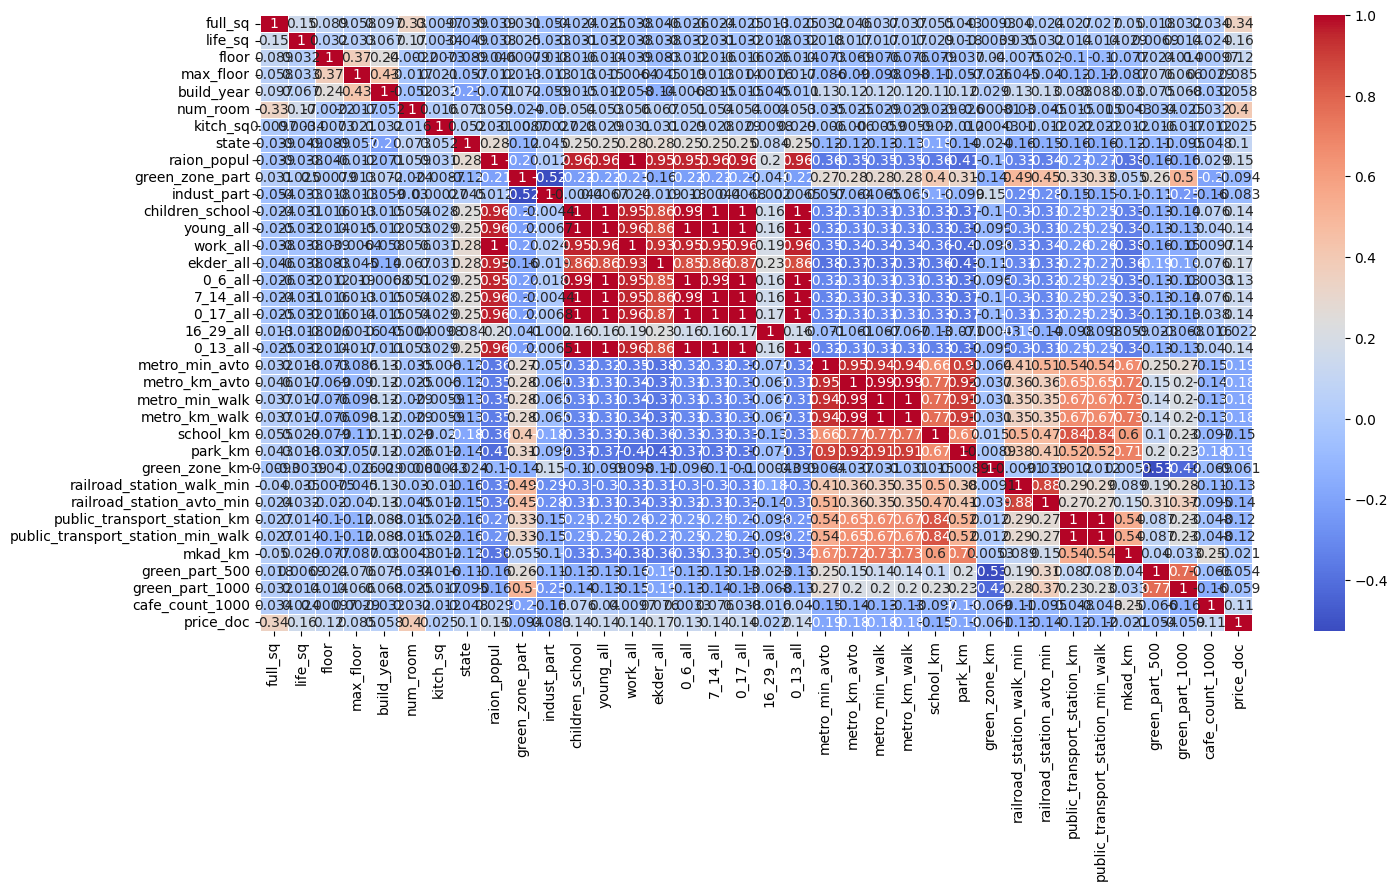

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [ ]:
import numpy as np
corrs = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))
col_for_drop = [col for col in corrs.columns if any(corrs[col] > 0.75)]
col_for_drop

['children_school',
 'metro_km_avto',
 'metro_min_walk',
 'metro_km_walk',
 'school_km',
 'park_km',
 'railroad_station_avto_min',
 'public_transport_station_km',
 'public_transport_station_min_walk',
 'green_part_1000']

In [ ]:
df1 = df1.drop(columns=col_for_drop)

In [ ]:
num_features

['full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'children_school',
 'metro_min_avto',
 'metro_km_avto',
 'metro_min_walk',
 'metro_km_walk',
 'school_km',
 'park_km',
 'green_zone_km',
 'railroad_station_walk_min',
 'railroad_station_avto_min',
 'public_transport_station_km',
 'public_transport_station_min_walk',
 'mkad_km',
 'green_part_500',
 'green_part_1000',
 'cafe_count_1000',
 'price_doc']

In [ ]:
num_features = [col for col in df1.columns if df1[col].dtype != 'object' and col != 'price']

In [ ]:
num_features

['full_sq',
 'life_sq',
 'floor',
 'max_floor',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'raion_popul',
 'green_zone_part',
 'indust_part',
 'metro_min_avto',
 'green_zone_km',
 'railroad_station_walk_min',
 'mkad_km',
 'green_part_500',
 'cafe_count_1000',
 'price_doc']

In [ ]:
from sklearn.feature_selection import VarianceThreshold
cutter = VarianceThreshold(threshold=0.1)
cutter.fit(df1[num_features])
cols = [col for col in num_features if col not in cutter.get_feature_names_out()]
print(cols)

['green_zone_part', 'indust_part', 'green_zone_km']


In [ ]:
df1 = df1.drop(columns=cols)

категориальные фичи

In [ ]:
df1[cat_features].head()

,timestamp,product_type,sub_area,culture_objects_top_25,water_1line,big_road1_1line,railroad_1line,ecology
0,2011-08-20,Investment,Bibirevo,no,no,no,no,good
1,2011-08-23,Investment,Nagatinskij Zaton,yes,no,no,no,excellent
2,2011-08-27,Investment,Tekstil'shhiki,no,no,no,no,poor
3,2011-09-01,Investment,Mitino,no,no,no,no,good
4,2011-09-05,Investment,Basmannoe,no,no,no,yes,excellent


In [ ]:
df1.groupby('culture_objects_top_25')['price_doc'].mean()

,price_doc
culture_objects_top_25,
no,6.924697e+06
yes,1.005933e+07


In [ ]:
df1.groupby('water_1line')['price_doc'].mean()

,price_doc
water_1line,
no,7.176112e+06
yes,6.484066e+06


In [ ]:
df1.groupby('big_road1_1line')['price_doc'].mean()

,price_doc
big_road1_1line,
no,7.075624e+06
yes,8.925379e+06


In [ ]:
df1.groupby('railroad_1line')['price_doc'].mean()

,price_doc
railroad_1line,
no,7.144896e+06
yes,6.398952e+06


In [ ]:
df1.groupby('ecology')['price_doc'].mean()


,price_doc
ecology,
excellent,8.201253e+06
good,7.082095e+06
no data,5.241630e+06
poor,7.747996e+06
satisfactory,8.599506e+06


In [ ]:
df1['culture_objects_top_25'] = df1['culture_objects_top_25'].map({'yes': 1, 'no': 0})
df1['water_1line'] = df1['water_1line'].map({'yes': 1, 'no': 0})
df1['railroad_1line'] = df1['railroad_1line'].map({'yes': 1, 'no': 0})
df1['big_road1_1line'] = df1['big_road1_1line'].map({'yes': 1, 'no': 0})
df1['ecology'] = df1['ecology'].map({'poor': 1, 'satisfactory': 2, 'good': 3, 'excellent': 4, 'no data': 0})

In [ ]:
df1.groupby('product_type')['price_doc'].mean()

,price_doc
product_type,
Investment,7.495294e+06
OwnerOccupier,6.466255e+06


In [ ]:
df1['product_type'] = df1['product_type'].map({'Investment': 1, 'OwnerOccupier': 0})

In [ ]:
price_by_area = df1.groupby('sub_area')['price_doc'].mean().to_dict()
df1['sub_area_mean_price'] = df1['sub_area'].map(price_by_area)

In [ ]:
df1[cat_features].head()

,timestamp,product_type,sub_area,culture_objects_top_25,water_1line,big_road1_1line,railroad_1line,ecology
0,2011-08-20,1,Bibirevo,0,0,0,0,3
1,2011-08-23,1,Nagatinskij Zaton,1,0,0,0,4
2,2011-08-27,1,Tekstil'shhiki,0,0,0,0,1
3,2011-09-01,1,Mitino,0,0,0,0,3
4,2011-09-05,1,Basmannoe,0,0,0,1,4


In [ ]:
df1 = df1.drop(columns=['timestamp', 'sub_area'])

In [ ]:
df1.head()

,full_sq,life_sq,floor,max_floor,build_year,num_room,kitch_sq,state,product_type,raion_popul,culture_objects_top_25,metro_min_avto,railroad_station_walk_min,water_1line,mkad_km,big_road1_1line,railroad_1line,ecology,green_part_500,cafe_count_1000,price_doc,sub_area_mean_price
0,43,27.0,4.0,12.0,1979.0,2.0,6.0,2.0,1,155572,0,2.590241,65.038716,0,1.422391,0,0,3,0.00,19,5850000,6.670177e+06
1,34,19.0,3.0,12.0,1979.0,2.0,6.0,2.0,1,115352,1,0.936700,40.943917,0,9.503405,0,0,4,25.14,13,6000000,8.392539e+06
2,43,29.0,2.0,12.0,1979.0,2.0,6.0,2.0,1,101708,0,2.120999,15.331896,0,5.604800,0,0,1,1.67,9,5700000,6.605066e+06
3,89,50.0,9.0,12.0,1979.0,2.0,6.0,2.0,1,178473,0,1.489049,51.497190,0,2.677824,0,0,3,17.36,12,13100000,8.809623e+06
4,77,77.0,4.0,12.0,1979.0,2.0,6.0,2.0,1,108171,0,1.257186,10.247521,0,11.616653,0,1,4,3.56,153,16331452,1.158772e+07


In [ ]:
from sklearn.model_selection import train_test_split
X = df1.drop('price_doc', axis=1)
y = df1['price_doc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
preds_train = model.predict(X_train)
preds_test = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
print(f"RMSE train: {rmse_train:.2f}")
print(f"RMSE test: {rmse_test:.2f}")

RMSE train: 3742407.15
RMSE test: 3577840.91


<Axes: ylabel='price_doc'>

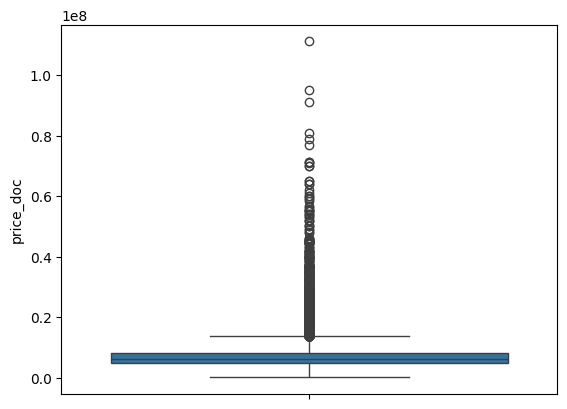

In [ ]:
sns.boxplot(df1['price_doc'])

In [ ]:
top_quantile = df1['price_doc'].quantile(0.95)
low_quantile = df1['price_doc'].quantile(0.05)
df_new = df1[(df1['price_doc'] > low_quantile) & (df1['price_doc'] < top_quantile)]

<Axes: ylabel='price_doc'>

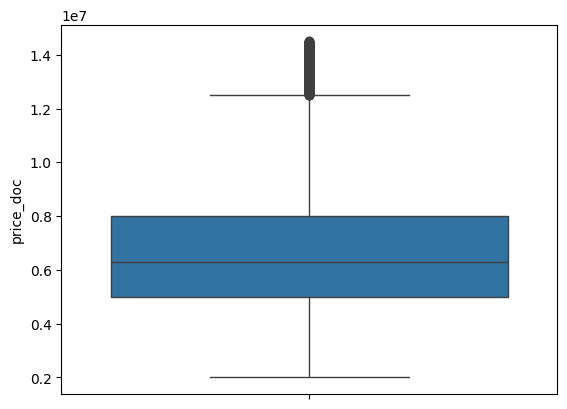

In [ ]:
sns.boxplot(df_new['price_doc'])

In [ ]:
X = df_new.drop('price_doc', axis=1)
y = df_new['price_doc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
preds_train = model.predict(X_train)
preds_test = model.predict(X_test)
rmse_train = np.sqrt(mean_squared_error(y_train, preds_train))
rmse_test = np.sqrt(mean_squared_error(y_test, preds_test))
print(f"RMSE train: {rmse_train:.2f}")
print(f"RMSE test: {rmse_test:.2f}")

RMSE train: 1852392.79
RMSE test: 1752021.36


In [ ]:
mean_price_train = y_train.mean()
mean_price_test = y_test.mean()
relative_error_train = (rmse_train / mean_price_train) * 100
relative_error_test = (rmse_test / mean_price_test) * 100
print(f"RMSE train: {rmse_train:,.0f} руб. ({relative_error_train:.1f}% от средней цены)")
print(f"RMSE test: {rmse_test:,.0f} руб. ({relative_error_test:.1f}% от средней цены)")

RMSE train: 1,852,393 руб. (27.5% от средней цены)
RMSE test: 1,752,021 руб. (26.1% от средней цены)


In [ ]:
from sklearn.linear_model import Lasso, Ridge
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)

Lasso()

In [ ]:
preds_train_lasso = model_lasso.predict(X_train)
preds_test_lasso = model_lasso.predict(X_test)
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, preds_train_lasso))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, preds_test_lasso))
mean_price_train = y_train.mean()
mean_price_test = y_test.mean()
relative_error_train_lasso = (rmse_train_lasso / mean_price_train) * 100
relative_error_test_lasso = (rmse_test_lasso / mean_price_test) * 100

print(f"Lasso RMSE train: {rmse_train_lasso:.0f} руб. ({relative_error_train_lasso:.1f}% от средней цены)")
print(f"Lasso RMSE test: {rmse_test_lasso:.0f} руб. ({relative_error_test_lasso:.1f}% от средней цены)")

Lasso RMSE train: 1852393 руб. (27.5% от средней цены)
Lasso RMSE test: 1752021 руб. (26.1% от средней цены)


In [ ]:
preds_train_ridge = model_Ridge.predict(X_train)
preds_test_ridge = model_Ridge.predict(X_test)
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, preds_train_ridge))
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, preds_test_ridge))
relative_error_train_ridge = (rmse_train_ridge / mean_price_train) * 100
relative_error_test_ridge = (rmse_test_ridge / mean_price_test) * 100

print(f"Ridge RMSE train: {rmse_train_ridge:.0f} руб. ({relative_error_train_ridge:.1f}% от средней цены)")
print(f"Ridge RMSE test: {rmse_test_ridge:.0f} руб. ({relative_error_test_ridge:.1f}% от средней цены)")

Ridge RMSE train: 1852393 руб. (27.5% от средней цены)
Ridge RMSE test: 1752019 руб. (26.1% от средней цены)


In [ ]:
from sklearn.preprocessing import StandardScaler
alphas = [0.001, 0.01, 0.1, 1, 10]
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Lasso результаты:")
for alpha in alphas:
    model = Lasso(alpha=alpha, random_state=42)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"Alpha {alpha}: RMSE = {rmse:.0f}")

print("\nRidge результаты:")
for alpha in alphas:
    model = Ridge(alpha=alpha, random_state=42)
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"Alpha {alpha}: RMSE = {rmse:.0f}")

Lasso результаты:
Alpha 0.001: RMSE = 1752021
Alpha 0.01: RMSE = 1752021
Alpha 0.1: RMSE = 1752021
Alpha 1: RMSE = 1752022
Alpha 10: RMSE = 1752023

Ridge результаты:
Alpha 0.001: RMSE = 1752021
Alpha 0.01: RMSE = 1752021
Alpha 0.1: RMSE = 1752022
Alpha 1: RMSE = 1752024
Alpha 10: RMSE = 1752045


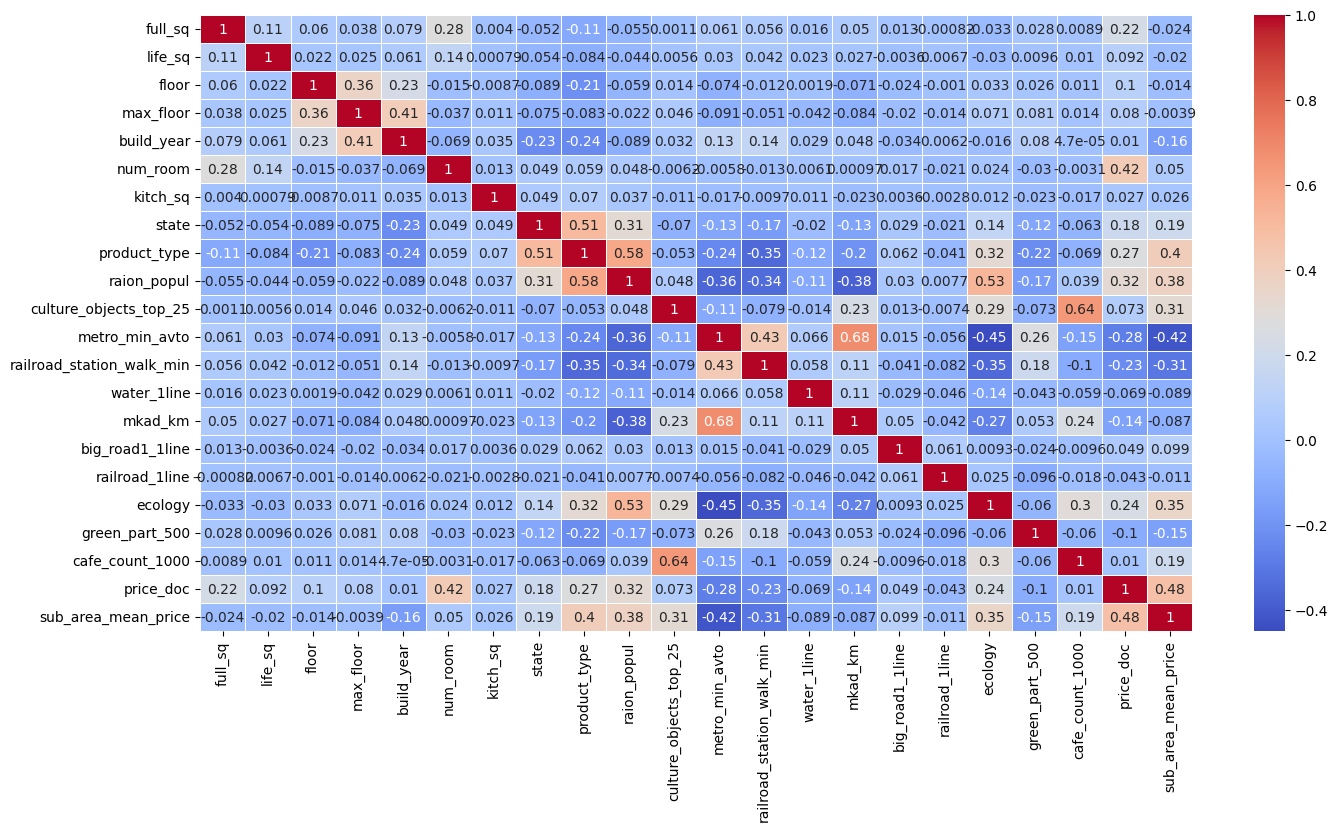

In [ ]:
df_corr = df_new.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()